<a href="https://colab.research.google.com/github/Deepthishanmugam/Sales_Forecasting_Complete/blob/main/Sales_Vizualisations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Importing necessary libraries & Installing Packages**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import gdown

from wordcloud import WordCloud

###**Downloading necessary.csv file**
 - Since there are two files we are downloading them separately

In [2]:
import gdown

# Downloading datasets using file IDs
file_ids = [
    "1ditFn_74EOsGnblf2nXr-Vx-I1mrCG42",
    "1CclWDHsFLfCAuBbAv83_D5_XmeoRwWzl"
]

for file_id in file_ids:
    url = f"https://drive.google.com/uc?id={file_id}"
    gdown.download(url, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1ditFn_74EOsGnblf2nXr-Vx-I1mrCG42
To: /content/TRAIN.csv
100%|██████████| 9.33M/9.33M [00:00<00:00, 27.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1CclWDHsFLfCAuBbAv83_D5_XmeoRwWzl
To: /content/TEST_FINAL.csv
100%|██████████| 849k/849k [00:00<00:00, 23.3MB/s]


###**Reading .csv file**


In [3]:
df1 = pd.read_csv('TRAIN.csv')
df1.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [4]:
df = df1

In [19]:
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales,year,month,day
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84,2018,1,1
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12,2018,1,1
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20,2018,1,1
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16,2018,1,1
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52,2018,1,1


####**Store_Type_Distribution**
 Its crucial to understand the Store_Type_Distribution for below factors

  - Optimizing Store Performance

  - Inventory Management

  - Marketing Strategy

  - Resource Allocation

  - Profitability Analysis

  - Location Strategy and Expansion

<ipython-input-6-4787329e9e65>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y.append(dir_group [idx])


['S1', 'S4', 'S2', 'S3']
[88752, 45924, 28896, 24768]
['S1', 'S4', 'S2', 'S3']
[88752, 45924, 28896, 24768]


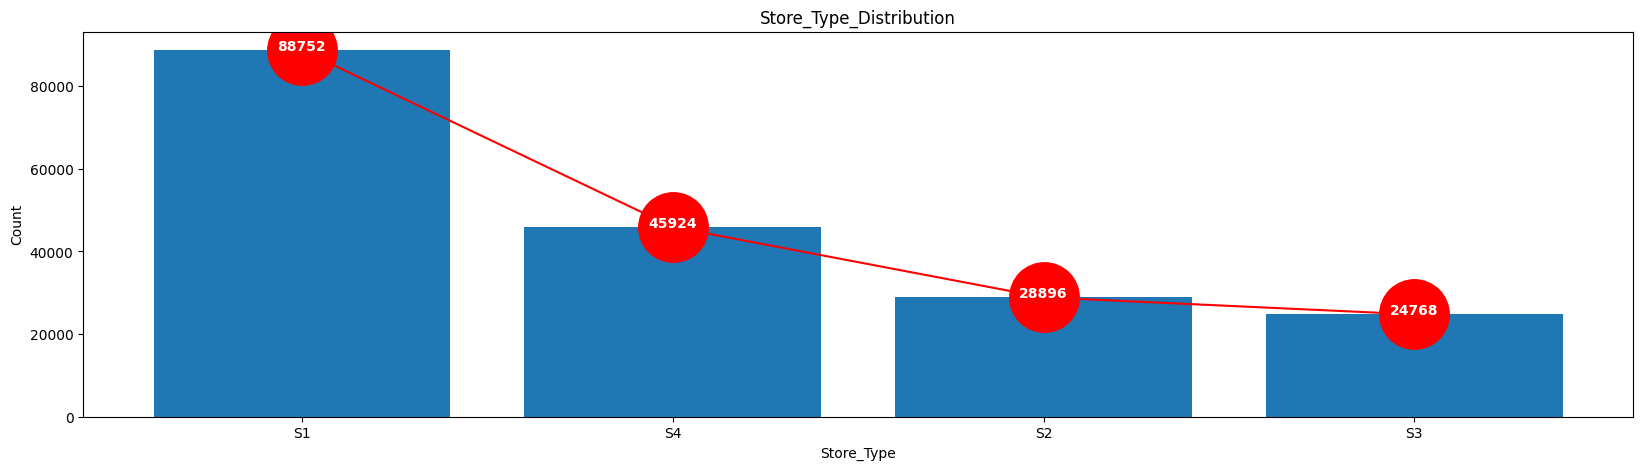

In [6]:
# Store_Type_Distribution
plt.figure(figsize=(20,5))
dir_group = df['Store_Type'].value_counts()
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center',color='w',weight = 'bold')
x=[]
y=[]
dir_group.dropna(inplace=True)
for idx, name in enumerate(dir_group.index.tolist()):
    x.append(name)
    y.append(dir_group [idx])
print(x)
print(y[0:10])
label = "{:}".format(y[0:10])
addlabels(x[0:10], y[0:10])
plt.title("Store_Type_Distribution")
x=x[0:10]
y=y[0:10]
plt.bar(x,y)
print(x[0:10])
print(y[0:10])
plt.plot(x,y,marker='o',ms=50, color='r')
plt.ylabel("Count")
plt.xlabel("Store_Type")
plt.show()


####**Region_Distribution**
Its crucial to understand the Region_Distribution for below factors
 - Optimizing Sales Performance Across Regions
 - Efficient Resource Allocation
 - Market Expansion and New Location Decisions
 - Targeted Marketing and Promotions
 - Understanding Demographics and Customer Segmentation
 - Regional Seasonality and Trends
 - Identifying Regional Risks


<ipython-input-7-1dd05a455de4>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y.append(dir_group [idx])


['R1', 'R2', 'R3', 'R4']
[63984, 54180, 44376, 25800]
['R1', 'R2', 'R3', 'R4']
[63984, 54180, 44376, 25800]


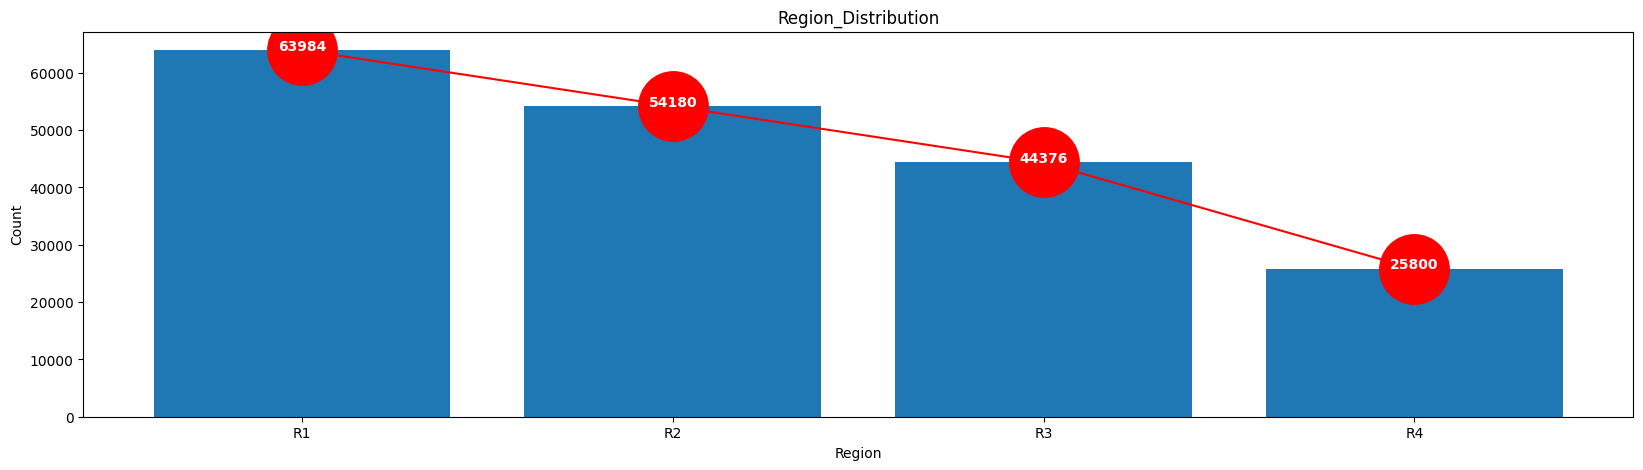

In [7]:
# Region_Distribution
plt.figure(figsize=(20,5))
dir_group = df['Region_Code'].value_counts()
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center',color='w',weight = 'bold')
x=[]
y=[]
dir_group.dropna(inplace=True)
for idx, name in enumerate(dir_group.index.tolist()):
    x.append(name)
    y.append(dir_group [idx])
print(x)
print(y[0:10])
label = "{:}".format(y[0:10])
addlabels(x[0:10], y[0:10])
plt.title("Region_Distribution")
x=x[0:10]
y=y[0:10]
plt.bar(x,y)
print(x[0:10])
print(y[0:10])
plt.plot(x,y,marker='o',ms=50, color='r')
plt.ylabel("Count")
plt.xlabel("Region")
plt.show()


####**Location_Distribution**
Its crucial to understand the Location_Distribution for below factors
 - Optimizing Sales and Profitability
 - Targeted Marketing and Customer Engagement
 - Effective Resource Allocation
 - Identifying Growth Opportunities
 - Supply Chain and Logistics Optimization
 - Customer Experience and Accessibility
 - Risk Management

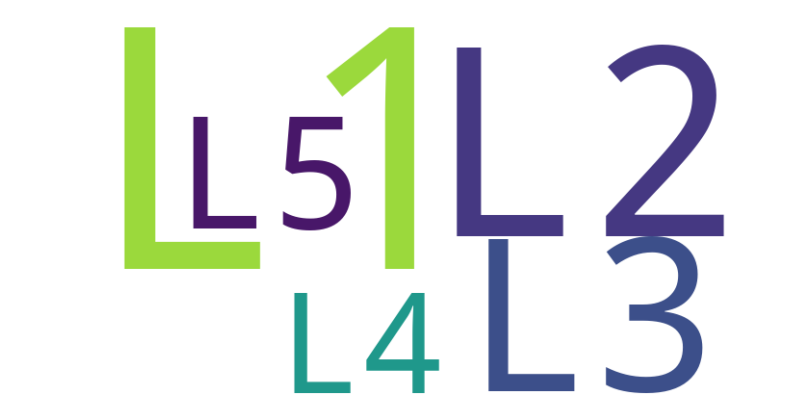

In [8]:
# Location_Distribution
text = " ".join(review for review in df['Location_Type'])
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=200,
    colormap='viridis'
).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

####**Month_wise_sales_Distribution**
Its crucial to understand the Month_wise_sales_Distribution for below factors
-  Identifying Seasonal Trends
- Product Lifecycle Management
- Assessing the Effectiveness of Past Campaigns
- Better Financial Forecasting
- Resource Planning and Staffing
- Seasonal Marketing Campaigns

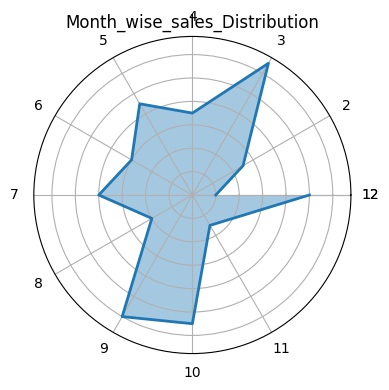

In [9]:
# Month_wise_sales_Distribution
grouped = df.groupby(['month'])['Sales'].first()
grouped = grouped.reset_index()
grouped['rank'] = grouped['Sales'].rank(ascending=True)
grouped.set_index('rank', inplace=True)
labels = grouped['month']
values = grouped.index

labels = grouped['month']
values = grouped.index
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles.pop(-1)
angles

# Create the plot
values += values[:1]
angles += angles[:1]
fig, ax = plt.subplots(figsize=(4, 4), subplot_kw=dict(polar=True))
ax.plot(angles, values, linewidth=2, linestyle='solid', label='Category 1')
ax.fill(angles, values, alpha=0.4)
ax.set_yticklabels([])
ax.set_xticks(angles)
ax.set_xticklabels(labels)
plt.title('Month_wise_sales_Distribution')
plt.tight_layout()
plt.show()

####**Day_wise_data_distribution**
Its crucial to understand the Day_wise_data_distribution for below factors
- Identifying Daily Sales Patterns
- Promotional analysis
- Hiloday impacts
- Improving Operational Efficiency
- Financial Planning and Cash Flow Management

Text(0.5, 0, 'Day')

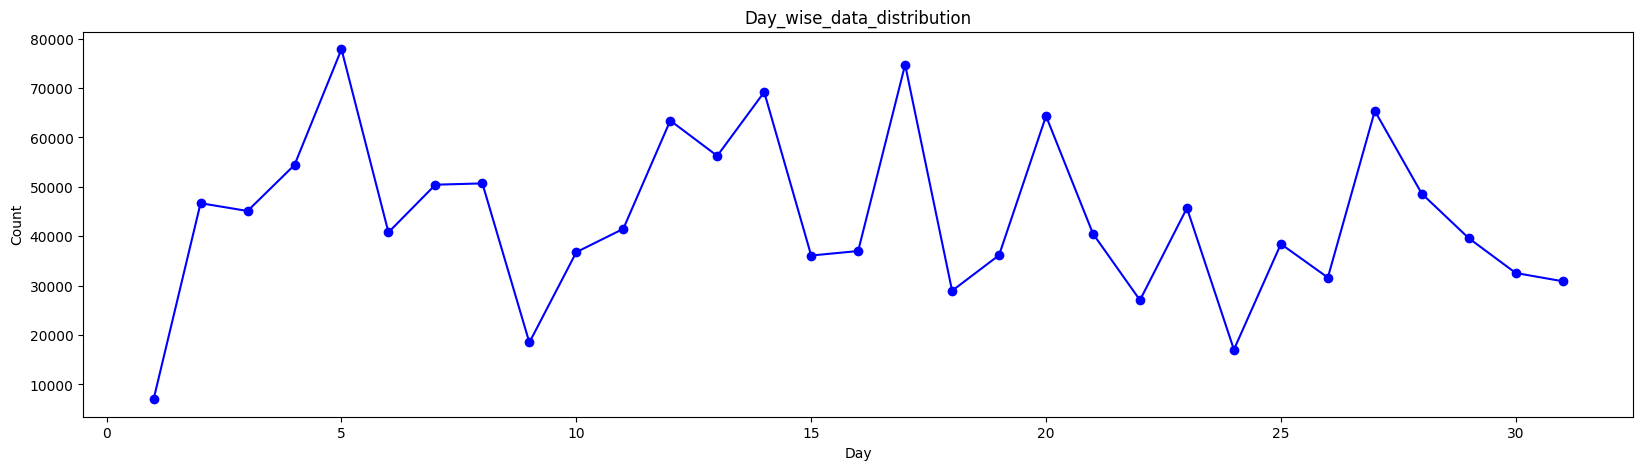

In [21]:
# Day_wise_data_distribution
grouped_occ = df.groupby(['day'])['Sales'].first().reset_index()

plt.figure(figsize=(20,5))
grouped_occ[['day','Sales']]
gr1 = grouped_occ.groupby(['day'])['Sales'].first()
gr1 = gr1.reset_index()
plt.plot(gr1['day'], gr1['Sales'], marker='o', linestyle='-', color='b')
plt.title('Day_wise_data_distribution')
plt.ylabel("Count")
plt.xlabel("Day")

####**Discount effects on Sales**
Its crucial to understand the Discount effects on Sales for below factors
- Boosting Short-Term Sales
- Driving Customer Acquisition and Retention
- Optimizing Profitability
- Understanding Price Sensitivity
- Managing Profitability During Price Wars

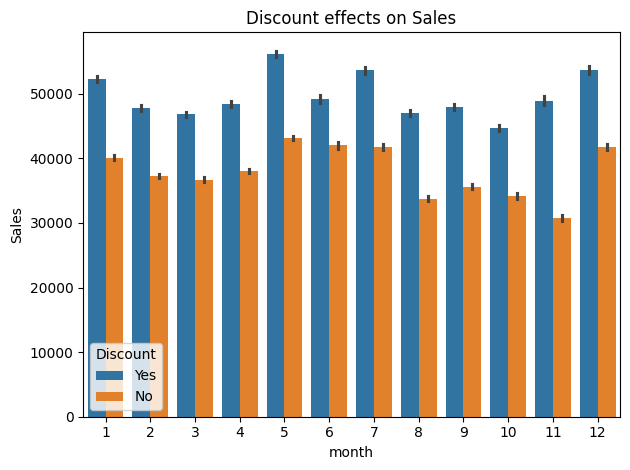

In [12]:
a = df[['month','Discount','Sales']].value_counts().reset_index()
a = a.sort_values(by='Sales', ascending=False)
sns.barplot(a, x="month", y="Sales", hue="Discount")
plt.title('Discount effects on Sales')
plt.tight_layout()
plt.show()

####**Holiday effects on Sales**
Its crucial to understand the Holiday effects on Sales for below factors
- Significant Changes in Consumer Behavior
- Seasonal Boost to Sales
- Strategic Marketing and Promotions
- Staffing and Resource Management
- Understanding Holiday-Driven Price Sensitivity
- Holiday-Specific Industry Trends

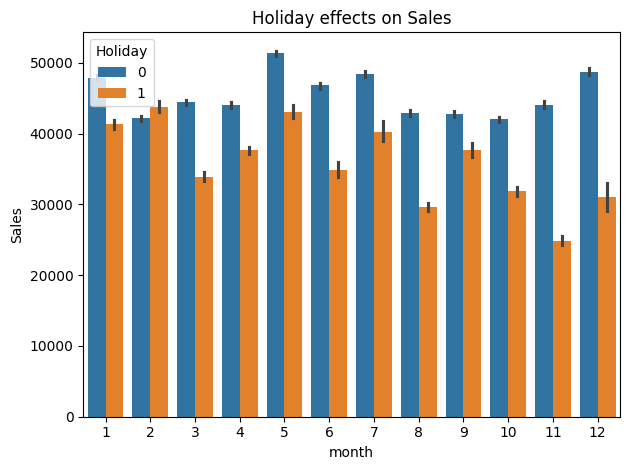

In [13]:
a = df[['month','Holiday','Sales']].value_counts().reset_index()
a = a.sort_values(by='Sales', ascending=False)
sns.barplot(a, x="month", y="Sales", hue="Holiday")
plt.title('Holiday effects on Sales')
plt.tight_layout()
plt.show()

####**Holiday & Discount distribution**
Its crucial to understand the Holiday & Discount distribution for below factors
- Understanding Customer Behavior
- Avoiding Over-Discounting
- Competitive Advantage
We could see these promotional analysis shows equal or very less impacts on sales

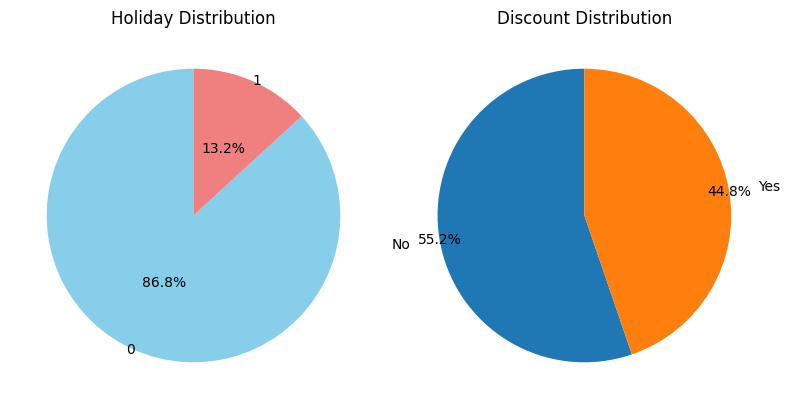

In [15]:
# Holiday Distribution
plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
Holiday_count = df['Holiday'].value_counts()
Holiday_count.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'],  labeldistance=1.0, pctdistance=0.5)
plt.title('Holiday Distribution')
plt.ylabel('')
plt.tight_layout()

# Discount Distribution
plt.subplot(1, 2, 2)
Discount_count = df['Discount'].value_counts()
Discount_count.plot(kind='pie', autopct='%1.1f%%', startangle=90,  labeldistance=1.2, pctdistance=1.0)
plt.title('Discount Distribution')
plt.ylabel('')
plt.tight_layout()

